# Retriever And Chain With Langchain
---
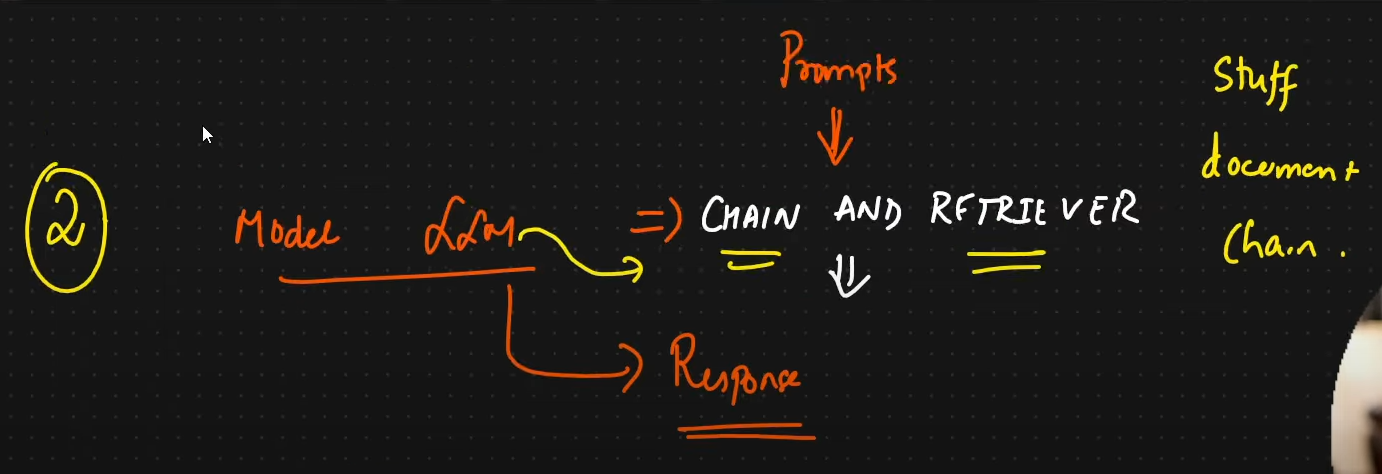
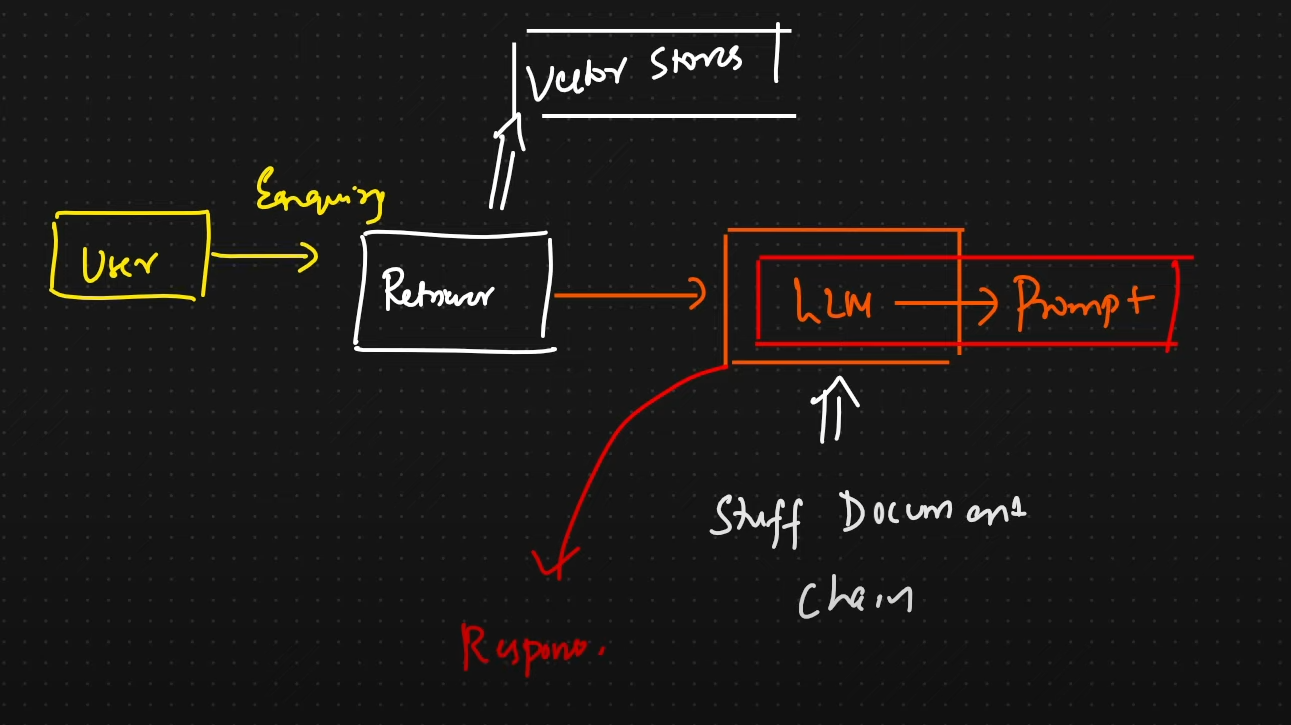

In [1]:
from langchain_community.document_loaders import PyPDFLoader
loader = PyPDFLoader("attention.pdf")
docs = loader.load()
docs

[Document(page_content='Provided proper attribution is provided, Google hereby grants permission to\nreproduce the tables and figures in this paper solely for use in journalistic or\nscholarly works.\nAttention Is All You Need\nAshish Vaswani∗\nGoogle Brain\navaswani@google.comNoam Shazeer∗\nGoogle Brain\nnoam@google.comNiki Parmar∗\nGoogle Research\nnikip@google.comJakob Uszkoreit∗\nGoogle Research\nusz@google.com\nLlion Jones∗\nGoogle Research\nllion@google.comAidan N. Gomez∗ †\nUniversity of Toronto\naidan@cs.toronto.eduŁukasz Kaiser∗\nGoogle Brain\nlukaszkaiser@google.com\nIllia Polosukhin∗ ‡\nillia.polosukhin@gmail.com\nAbstract\nThe dominant sequence transduction models are based on complex recurrent or\nconvolutional neural networks that include an encoder and a decoder. The best\nperforming models also connect the encoder and decoder through an attention\nmechanism. We propose a new simple network architecture, the Transformer,\nbased solely on attention mechanisms, dispensing 

In [3]:
from langchain.text_splitter import RecursiveCharacterTextSplitter

text_splitter = RecursiveCharacterTextSplitter(chunk_size=1000, chunk_overlap=20)
text_splitter.split_documents(docs)[:5]

[Document(page_content='Provided proper attribution is provided, Google hereby grants permission to\nreproduce the tables and figures in this paper solely for use in journalistic or\nscholarly works.\nAttention Is All You Need\nAshish Vaswani∗\nGoogle Brain\navaswani@google.comNoam Shazeer∗\nGoogle Brain\nnoam@google.comNiki Parmar∗\nGoogle Research\nnikip@google.comJakob Uszkoreit∗\nGoogle Research\nusz@google.com\nLlion Jones∗\nGoogle Research\nllion@google.comAidan N. Gomez∗ †\nUniversity of Toronto\naidan@cs.toronto.eduŁukasz Kaiser∗\nGoogle Brain\nlukaszkaiser@google.com\nIllia Polosukhin∗ ‡\nillia.polosukhin@gmail.com\nAbstract\nThe dominant sequence transduction models are based on complex recurrent or\nconvolutional neural networks that include an encoder and a decoder. The best\nperforming models also connect the encoder and decoder through an attention\nmechanism. We propose a new simple network architecture, the Transformer,\nbased solely on attention mechanisms, dispensing 

In [4]:
documents=text_splitter.split_documents(docs)
documents

[Document(page_content='Provided proper attribution is provided, Google hereby grants permission to\nreproduce the tables and figures in this paper solely for use in journalistic or\nscholarly works.\nAttention Is All You Need\nAshish Vaswani∗\nGoogle Brain\navaswani@google.comNoam Shazeer∗\nGoogle Brain\nnoam@google.comNiki Parmar∗\nGoogle Research\nnikip@google.comJakob Uszkoreit∗\nGoogle Research\nusz@google.com\nLlion Jones∗\nGoogle Research\nllion@google.comAidan N. Gomez∗ †\nUniversity of Toronto\naidan@cs.toronto.eduŁukasz Kaiser∗\nGoogle Brain\nlukaszkaiser@google.com\nIllia Polosukhin∗ ‡\nillia.polosukhin@gmail.com\nAbstract\nThe dominant sequence transduction models are based on complex recurrent or\nconvolutional neural networks that include an encoder and a decoder. The best\nperforming models also connect the encoder and decoder through an attention\nmechanism. We propose a new simple network architecture, the Transformer,\nbased solely on attention mechanisms, dispensing 

In [5]:
from langchain_community.embeddings import OllamaEmbeddings
from langchain_community.vectorstores import FAISS

db=FAISS.from_documents(documents[:30],OllamaEmbeddings(model="llama3"))

In [6]:
db

In [9]:
query="An attention function can be described as mapping a query "
result=db.similarity_search(query)
result

[Document(page_content='Scaled Dot-Product Attention\n Multi-Head Attention\nFigure 2: (left) Scaled Dot-Product Attention. (right) Multi-Head Attention consists of several\nattention layers running in parallel.\nof the values, where the weight assigned to each value is computed by a compatibility function of the\nquery with the corresponding key.\n3.2.1 Scaled Dot-Product Attention\nWe call our particular attention "Scaled Dot-Product Attention" (Figure 2). The input consists of\nqueries and keys of dimension dk, and values of dimension dv. We compute the dot products of the\nquery with all keys, divide each by√dk, and apply a softmax function to obtain the weights on the\nvalues.\nIn practice, we compute the attention function on a set of queries simultaneously, packed together\ninto a matrix Q. The keys and values are also packed together into matrices KandV. We compute\nthe matrix of outputs as:\nAttention( Q, K, V ) = softmax(QKT\n√dk)V (1)', metadata={'source': 'attention.pdf', '

In [8]:
from langchain_community.llms import Ollama
## Load Ollama LAMA2 LLM model
llm=Ollama(model="llama3")
llm

Ollama(model='llama3')

In [11]:
## Design ChatPrompt Template
from langchain_core.prompts import ChatPromptTemplate
prompt = ChatPromptTemplate.from_template("""
Answer the following question based only on the provided context. 
Think step by step before providing a detailed answer. 
I will tip you $1000 if the user finds the answer helpful. 
<context>
{context}
</context>
Question: {input}""")

In [12]:
## Chain Introduction
## Create Stuff Docment Chain

from langchain.chains.combine_documents import create_stuff_documents_chain

document_chain=create_stuff_documents_chain(llm,prompt)

In [13]:
"""
Retrievers: A retriever is an interface that returns documents given
 an unstructured query. It is more general than a vector store.
 A retriever does not need to be able to store documents, only to 
 return (or retrieve) them. Vector stores can be used as the backbone
 of a retriever, but there are other types of retrievers as well. 
 https://python.langchain.com/docs/modules/data_connection/retrievers/   
"""

retriever=db.as_retriever()
retriever

VectorStoreRetriever(tags=['FAISS', 'OllamaEmbeddings'], vectorstore=<langchain_community.vectorstores.faiss.FAISS object at 0x000001E2A3CE2570>)

In [14]:
"""
Retrieval chain:This chain takes in a user inquiry, which is then
passed to the retriever to fetch relevant documents. Those documents 
(and original inputs) are then passed to an LLM to generate a response
https://python.langchain.com/docs/modules/chains/
"""
from langchain.chains import create_retrieval_chain
retrieval_chain=create_retrieval_chain(retriever,document_chain)

In [19]:
response=retrieval_chain.invoke({"input":"Scaled Dot-Product Attention"})

In [20]:
response['answer']

'Based on the provided context, I understand that you are asking about the concept of "Scaled Dot-Product Attention".\n\nAccording to the text, Scaled Dot-Product Attention is identical to the algorithm described in this context, except for a scaling factor of 1/√dk. This means that the original dot-product attention mechanism needs to be scaled by 1/√dk to avoid issues with extremely small gradients when working with large values of dk.\n\nIn other words, Scaled Dot-Product Attention is a modified version of regular dot-product attention that includes this scaling factor to prevent the softmax function from being pushed into regions with very small gradients. This modification allows the model to work more efficiently and accurately for larger values of dk.\n\nI hope this answer helps!'